This is anonymized data to protect private information. Will proceed to detect fraudelent transaction using several machine learning and deep learning algorithim, and finally will raise precision using oversampling-SMOTE methods.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv("Dataset/creditcard.csv")

## DATA EXPLORATION

In [3]:
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing

In [4]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

X.head(), y.head()

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9   ...         V20       V21       V22       V23  \
 0  0.098698  0.363787   ...    0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425   ...   -0.069083 -0.225775 -0.638672  0.101288   
 2  0.247676 -1.514654   ...    0.524980  0.247998  0.771679  0.909412   
 3  0.377436 -1.387024   ...   -0.208038 -0.108300  0.005274 -0.190321   
 4 -0.270533  0.817739   ...    0.408542 -0.009431  0.798278 -0.137458   
 
         V24       V25       V26       V27       V28  Amount

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['NormalizedAmount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['NormalizedAmount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))

X_train = X_train.drop(['Amount', 'Time'], axis = 1)
X_test = X_test.drop(['Amount', 'Time'], axis = 1)

/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
X['NormalizedAmount'] = sc.fit_transform(X['Amount'].values.reshape(-1,1))
X = X.drop(['Amount', 'Time'], axis = 1)

In [8]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Model Creation

### 1. Artificial Neural Network - Accuracy: 99.94%

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
199364/199364 [==============================] - 19s 96us/step - loss: 0.0096 - accuracy: 0.9978
Epoch 2/5
199364/199364 [==============================] - 26s 129us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 23s 116us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 23s 116us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 22s 110us/step - loss: 0.0034 - accuracy: 0.9994


In [14]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 1s 16us/step
[0.0038607557368046776, 0.9993914365768433]


In [15]:
# ANN accuracy
y_pred = model.predict(X_test)
(y_pred.round() == y_test).mean()

0.9993914071369217

In [16]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred.round())
print(cnf_matrix)

[[85275    21]
 [   31   116]]


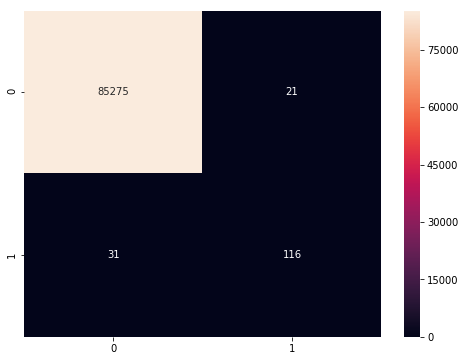

In [17]:
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

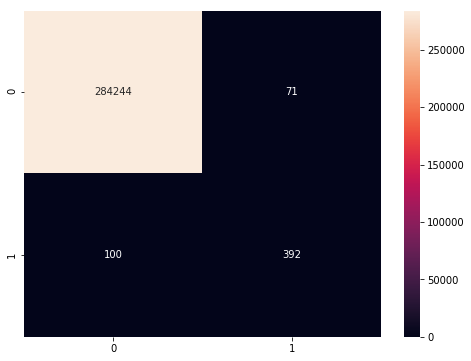

In [18]:
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

### 2. Random Forest - Accuracy: 99.69%

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)


In [20]:
rf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [21]:
y_pred2 = rf.predict(X_test)

In [22]:
# Random Forest Accuracy
(y_pred2 == y_test).mean()

0.9968916057015761

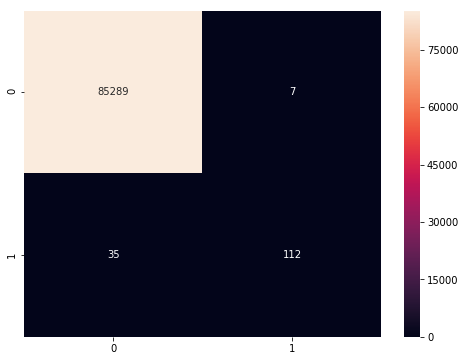

In [23]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

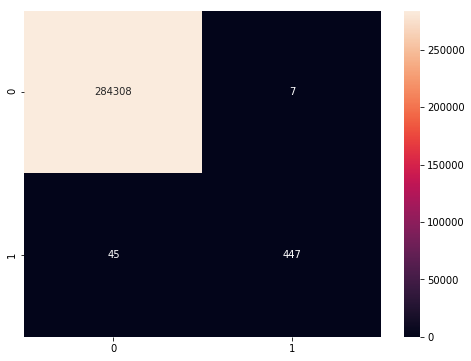

In [24]:
y_pred2 = rf.predict(X)
cm = confusion_matrix(y, y_pred2)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

### 3. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [26]:
y_pred3 = dt.predict(X_test)

In [27]:
(y_pred3 == y_test).mean()

0.9966350100716146

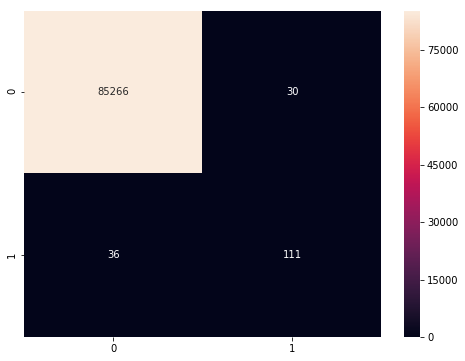

In [28]:
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

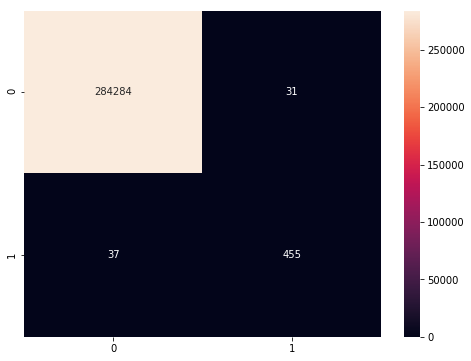

In [29]:
y_pred3 = dt.predict(X)
cm = confusion_matrix(y, y_pred3)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

## UnderSampling

In [30]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [31]:
normal_indices = data[data.Class == 0].index

In [32]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud)
print(len(random_normal_indices))

492


In [33]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [34]:
under_sample_data = data.iloc[under_sample_indices, :]
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [36]:
X_train['NormalizedAmount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['NormalizedAmount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))

X_train = X_train.drop(['Amount', 'Time'], axis = 1)
X_test = X_test.drop(['Amount', 'Time'], axis = 1)

/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test= np.array(y_test)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [39]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 0s 492us/step - loss: 0.4981 - accuracy: 0.9113
Epoch 2/5
688/688 [==============================] - 0s 121us/step - loss: 0.2250 - accuracy: 0.9230
Epoch 3/5
688/688 [==============================] - 0s 117us/step - loss: 0.1771 - accuracy: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 111us/step - loss: 0.1597 - accuracy: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 115us/step - loss: 0.1447 - accuracy: 0.9404


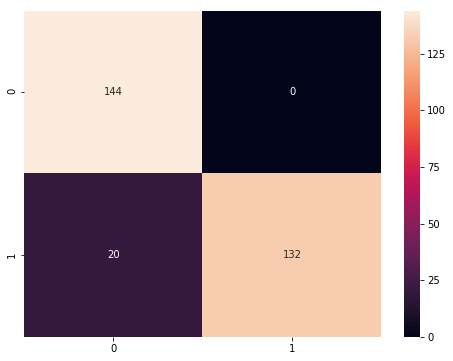

In [40]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

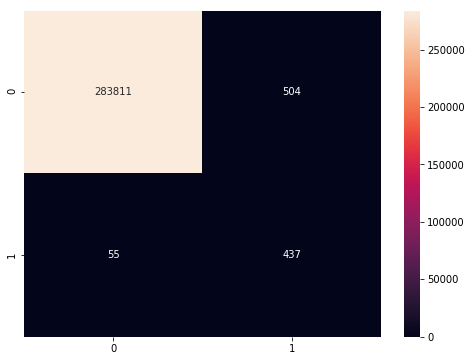

In [41]:
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

## SMOTE

In [42]:
%%bash 
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/jongwoopark/anaconda3/lib/python3.7/site-packages (0.7.0)


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [45]:
y_resample = pd.DataFrame(y_resample)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [47]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test= np.array(y_test)

In [48]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 46s 116us/step - loss: 0.0302 - accuracy: 0.9899
Epoch 2/5
398041/398041 [==============================] - 44s 109us/step - loss: 0.0138 - accuracy: 0.9963
Epoch 3/5
398041/398041 [==============================] - 44s 111us/step - loss: 0.0118 - accuracy: 0.9972
Epoch 4/5
398041/398041 [==============================] - 44s 110us/step - loss: 0.0100 - accuracy: 0.9976
Epoch 5/5
398041/398041 [==============================] - 43s 109us/step - loss: 0.0093 - accuracy: 0.9978


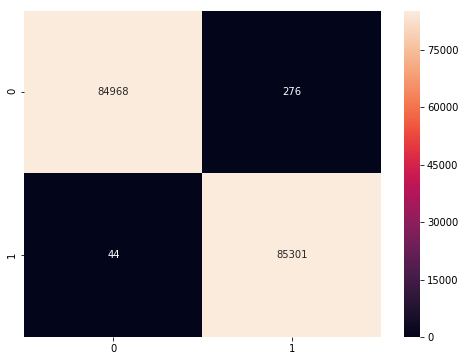

In [49]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')

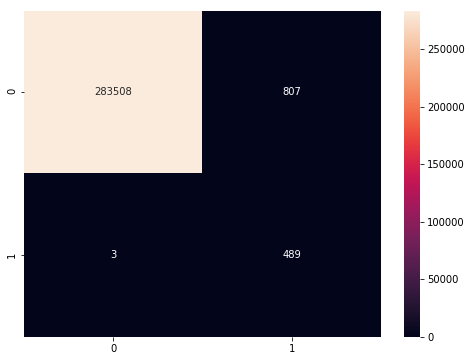

In [51]:
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'g')